In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('notebook')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 本院认为

In [3]:
import os
import re

In [5]:
dirs=os.listdir('./bribe_data/')
len(dirs)

20110

In [20]:
f=open('./bribe_data/'+dirs[2],'r',encoding='utf-8')
s=f.read().replace('\n','').replace('\r','')

In [21]:
s

'山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号公诉机关济南市历下区人民检察院。被告人刘堃，男，1976年5月18日出生于山东省平度市，汉族，大学文化，原系某传媒集团（山东）文化产业有限公司图书发行中心主任，户籍所在地济南市，现住济南市天桥区，因涉嫌犯受贿罪于2014年2月18日被刑事拘留，同年2月25日被取保候审，本院于2014年4月3日为其重新办理了取保候审手续，本院于同年4月3日为其重新办理了取保候审手续，同年8月14日被逮捕，现羁押于济南市看守所。济南市历下区人民检察院以济历下检刑诉（2014）259号起诉书指控被告人刘堃犯受贿罪，于2014年4月3日向本院提起公诉。本院于同日立案，并依法组成合议庭，于2014年8月7日公开开庭进行了审理。济南市历下区人民检察院指派代理检察员李莹出庭支持公诉，被告人刘堃到庭参加了诉讼。现已审理终结。公诉机关指控：被告人刘堃在担任山东某传媒集团文化产业有限公司图书发行中心主任期间，利用负责采购图书的职务便利，向他人索取图书回扣款共计44900元：1、2013年6月6日，被告人刘堃利用从北京某图书有限公司采购图书的职务便利，向该公司总经理朱某某索取购书回扣30500元，全部用于个人消费。2、2013年7月中旬，被告人刘堃利用从某有限公司采购图书的职务使用便利，向该公司业务主管王某某索要购书回扣14400元，全部用于个人消费。以上，被告人刘堃受贿数额共计44900元，案发后，赃款均已追回。就指控的上述事实，公诉机关提供了相应的证据。公诉机关认为，被告人刘堃身为国家工作人员，利用职务上的便利，索取他人财物，其行为已触犯了《中华人民共和国刑法》第三百八十五条第一款，犯罪事实清楚，证据确实充分，应当以受贿罪追究其刑事责任。被告人刘堃对指控的犯罪事实无异议，但辩称其系初犯，有自首情节，并在案发后主动退还了赃款，请求对其从轻处罚。经法庭审理查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4月3日起担任某传媒集团（山东）文化产业有限公司图书发行中心主任，负责该中心经营、图书采购及销售。被告人刘堃在2013年6月至7月期间，利用其职务便利，在采购图书的过程中向他人索取图书回扣款共计44900元。具体犯罪事实如下：1、2013年6月6日，被告人刘堃利用从北京某图书有限公司采购图书的职务

In [13]:
p1=re.compile('查明(.+?)本院认为')
m1=p1.search(s)
r1=m1.group(1)

In [16]:
re.search('徒刑(.+?)年',s).groups()

('三',)

In [27]:
m1.group(1)

'判决如下：被告人鹿国庆犯受贿罪，判处有期徒刑一年，缓刑一年；（缓刑考验期限，从判决确定之日起计算）二、被告人鹿国庆犯罪所得23000元人民币，予以追缴；由追缴单位上缴国库。'

In [36]:
%%time
results=[]
for file_name in dirs[:100]:
    file_path='./bribe_data/'+file_name
    f=open(file_path,'r',encoding='utf-8').read()
    s=f.replace('\n','')
    p1=re.compile('(判决如下.+?)如不服')
    m1=p1.search(s)
    if m1 is not None:
            dec=m1.group(1)
    else:
            dec=None
            print('处理{}时出错'.format(file_name))
    p2=re.compile('有期徒刑(.+?)，')
    p3=re.compile('缓刑(.+?)，')
    p4=re.compile('罚金(.+?元)')
    # p5=re.compile('拘役(.+?)，')
    m2=p2.search(dec)
    m3=p3.search(dec)
    m4=p4.search(dec)
    if m2 is not None:
            tuxing=m2.group(1)
            print(tuxing)
    else:
            tuxing=None
            pass
            print('处理{}时出错'.format(file_name))
    if m3 is not None:
            huanxing=m3.group(1)
            print(huanxing)
    else:
            huanxing=None
            pass
            print('处理{}时出错'.format(file_name))

    if m4 is not None:
            fajin=m4.group(1)
            print(fajin)
    else:
            fajin=None
            pass
            print('处理{}时出错'.format(file_name))
    results.append((file_name,dec,tuxing,huanxing,fajin))

三年
处理11303.txt时出错
人民币三十万元
三年三个月
处理3644.txt时出错
人民币二十八万元
三年（刑期从判决执行之日起计算。判决执行以前先行羁押的
处理19987.txt时出错
处理19987.txt时出错
十年
处理18441.txt时出错
处理18441.txt时出错
七年
处理5235.txt时出错
人民币三十万元
十年六个月
处理17772.txt时出错
处理17772.txt时出错
处理1053.txt时出错
处理1053.txt时出错
处理1053.txt时出错
处理13514.txt时出错
处理13514.txt时出错
处理13514.txt时出错
十年；犯挪用公款罪
处理8711.txt时出错
处理8711.txt时出错
一年
处理15165.txt时出错
十二万元
十二年
处理7422.txt时出错
处理7422.txt时出错
五年六个月；犯滥用职权罪
处理8077.txt时出错
处理8077.txt时出错
二年五个月缓刑三年
三年
十八万元
十一年三个月
处理7344.txt时出错
处理7344.txt时出错
一年六个月
二年
人民币10万元
一年二个月
处理13272.txt时出错
人民币二十万元
七年二个月（刑期从判决执行之日起计算
处理9369.txt时出错
处理9369.txt时出错
五年。（刑期从判决执行之日起计算。判决执行以前先行羁押的
处理18327.txt时出错
处理18327.txt时出错
三年
四年
二十万元
一年
一年。（缓刑考验期限
处理17014.txt时出错
六年；（刑期从判决执行之日起计算。判决执行以前先行羁押的
处理4895.txt时出错
处理4895.txt时出错
一年
一年六个月
人民币十万元
九年
处理3122.txt时出错
人民币三十万元
一年
二年。（缓刑考验期限
处理19039.txt时出错
三年八个月
处理5547.txt时出错
人民币三十万元
一年
一年六个月
十万元
六年六个月
处理17000.txt时出错
人民币六十万元
处理4881.txt时出错
六个月
十万元
一年六个月
处理2228.txt时出错
十七万元
处理11471.txt时出错
处理11471.txt时出错
处理11471.txt时出错
三年
五年（缓刑考验期从判决确定之日起计算）
人民币二十万元
一年六个月
二

TypeError: expected string or bytes-like object

In [40]:
df1=pd.DataFrame(results,columns=['file_name','dec','tuxing','huanxing','fajin'])
df1

,file_name,dec,tuxing,huanxing,fajin
0,11303.txt,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,三年,None,人民币三十万元
1,3644.txt,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,三年三个月,None,人民币二十八万元
2,19987.txt,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,三年（刑期从判决执行之日起计算。判决执行以前先行羁押的,None,None
3,18441.txt,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,十年,None,None
4,5235.txt,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,七年,None,人民币三十万元
...,...,...,...,...,...
83,6072.txt,判决如下：一、被告人夏养育犯受贿罪，判处有期徒刑三年六个月，并处罚金人民币二十五万元。（刑期...,三年六个月,None,人民币二十五万元
84,9341.txt,判决如下：被告人冯泽毅犯受贿罪，免予刑事处罚。二、被告人冯泽毅违法所得五万四千元，予以追缴，...,None,None,None
85,14535.txt,判决如下：一、被告人李安祥犯受贿罪，判处有期徒刑三年，并处罚金人民币二十万元；（有期徒刑的刑...,三年,None,人民币二十万元
86,2214.txt,判决如下：一、被告人谢某某犯贪污罪，判处有期徒刑一年十个月，并处罚金人民币10万元；犯受贿罪...,一年十个月,None,人民币10万元


In [41]:
df1.huanxing.unique()

array([None, '三年', '二年', '四年', '一年。（缓刑考验期限', '一年六个月', '二年。（缓刑考验期限', '六个月',
       '五年（缓刑考验期从判决确定之日起计算）', '一年；（缓刑考验期限', '五年', '一年',
       '二年。（缓刑考验期限从判决确定之日起计算。）二、被告人宋晓军违法犯罪所得予以没收',
       '三年（缓刑考验期限从本判决确定之日起计算）', '两年。（缓刑考验期限', '三年；并处罚金人民币六万元。（缓刑考验期限',
       '三年。（缓刑考验期'], dtype=object)

# 前100

In [46]:
import os,re

In [304]:
len(dirs)

20110

In [213]:
%%time
results=[]
for file_name in dirs[:300]:
    file_path='./bribe_data/'+file_name
    f=open(file_path,'r',encoding='utf-8').read()
    s=f.replace('\n','')
    p0=re.compile('.*?号')
    m0=p0.search(s)
    caseid=m0.group()
    
    p1=re.compile('.*?提起公诉')
    m1=p1.search(s)
    if m1 is not None:
        bafacts=m1.group()
    else:
        bafacts='none'
    p2=re.compile('(查明.*?)本院认为')
    m2=p2.search(s)
    if m2 is not None:
        ctfacts=m2.group()
    else:
        ctfacts='none'
    p3=re.compile('(本院认为.*?)判决如下')
    m3=p3.search(s)
    if m3 is not None:
        ctreason=m3.group()
    else:
        ctreason='none'
    p4=re.compile('判决如下.*')
    m4=p4.search(s)
    if m4 is not None:
        dec=m4.group()
    else:
        dec='none'
    p5=re.compile('罚金(.*?元)[，|。|（|；]')
    m5=p5.search(dec)
    if m5 is not None:
        fajin=m5.group(1)
    else:
        fajin='none'
    p6=re.compile('犯(.+?罪)，判处(.+?)[，|。|（|；]')
    m6=p6.search(dec)
    if m6 is not None:
        crime,tuxing=m6.group(1),m6.group(2)
    else:
        crime='none'
        tuxing='none'
    p7=re.compile('\d+?元')
    # m70=p7.findall(ctreason)
    # m71=p7.findall(ctfacts)
    # print(file_name,m70)
    results.append((file_name,caseid, ctfacts, ctreason, dec, fajin, crime, tuxing))

CPU times: user 3.32 s, sys: 23.7 ms, total: 3.34 s
Wall time: 3.42 s


In [214]:
df=pd.DataFrame(results,columns=['file_name','caseid','ctfacts','ctreason','decision','fajin','crime','tuxing'])
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年
...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月


In [70]:
df.ctreason[0]

'本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋取利益，究其行为已触犯刑律，构成受贿罪。公诉机关指控的被告人王某甲犯受贿罪事实清楚，证据确实充分，罪名成立，应予支持。在本案受贿犯罪事实中有19998.5元系被告人王某甲向严某索取，具有索贿情节，依法予以从重处罚。被告人王某甲归案后如实供述自己的罪行，依法可以从轻处罚。被告人王某甲退出全部赃款，可以酌情从轻处罚。辩护人提出被告人在案发前退出的人民币计117500元不应认定犯罪数额。经查，被告人王某甲在相关人和事被查处或因听说相关人或事将被查处，因害怕受到牵连退出赃款赃物的行为不符合法律规定的及时退出赃款，应当认定犯罪数额，其退赃情节，量刑时酌情从轻。辩护人提出被告人王某甲有自首及立功情节的辩护意见，经查，侦查机关在掌握被告人王某甲受贿线索后将其抓获归案，不符合自首构成要件，其归案后如实供述侦查机关掌握及未掌握的同种犯罪事实，依法可以从轻处罚。被告人王某甲立功线索尚未查证属实，不应认定有立功情节。综上，依照《中华人民共和国刑法》第三百八十五条第一款、第三百八十六条、第三百八十三条第一款第二项、第二款、第六十七条第三款、第六十四条、最高人民法院、最高人民检察院《关于办理贪污贿赂刑事案件适用法律若干问题的解释》第二条第一款之规定，判决如下'

## 犯罪金额

In [215]:
df['amounts_ctreason']=df['ctreason'].map(lambda x: [float(i['detail']['num']) for i in jio.ner.extract_money(x) if type(i['detail']['num'])!=type([])])
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]"
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,..."
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[]
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[]
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[]
...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ..."
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]"
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0]
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]"


In [216]:
df['amounts_ctfacts']=df['ctfacts'].map(lambda x: [float(i['detail']['num']) for i in jio.ner.extract_money(x) if type(i['detail']['num'])!=type([])])
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500...."
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0..."
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ..."
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000..."
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000..."
...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20..."
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,..."
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100..."
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ..."


In [217]:
df['amounts']=(df['ctfacts']+df['ctreason']).map(lambda x: [float(i['detail']['num']) for i in jio.ner.extract_money(x) if type(i['detail']['num'])!=type([])])
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500...."
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0..."
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ..."
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000..."
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000..."
...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20..."
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,..."
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100..."
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ..."


In [218]:
df['max_amount']=df['amounts'].map(lambda x: np.max(x))
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts,max_amount
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",221450.0
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",1793600.0
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",14000000.0
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",20000.0


In [ ]:
jio.ner.extract_money()

In [148]:
print(type([1]))

<class 'list'>


In [152]:
type([])==type([1])

True

In [141]:
df.amounts[1]

['10000.00',
 '200000.00',
 '100000.00',
 '50000.00',
 '50000.00',
 '410000.00',
 '100000.00',
 '310000.00',
 '725000.00',
 '12692187.00',
 '10968026.00',
 '9884314.00',
 '10008706.00',
 '100000.00',
 '310000.00',
 '100000.00',
 '50000.00',
 '50000.00',
 '50000.00',
 ['10000.00', '100000.00'],
 '20000.00',
 '20000.00',
 '50000.00',
 '100000.00',
 '50000.00',
 '200000.00',
 '50000.00',
 '10000.00',
 '50000.00',
 '60000.00',
 '10000.00',
 '100000.00',
 '410000.00',
 '10.00',
 '100000.00',
 '310000.00',
 '100000.00',
 '410000.00',
 '410000.00',
 '10.00']

## 罚金

In [219]:
df.fajin.unique()

array(['人民币三十万元', '人民币二十八万元', 'none', '十二万元', '十八万元', '人民币10万元',
       '人民币二十万元', '二十万元', '人民币十万元', '十万元', '人民币六十万元', '十七万元',
       '人民币100，000元', '二百万元', '人民币100000元', '人民币20万元', '150000元',
       '10000元', '人民币180000元', '人民币六万元', '人民币一百万元', '人民币二十五万元', '人民币八十万元',
       '人民币五十万元', '人民币十二万元', '人民币60万元', '人民币五十四万元', '人民币30万元',
       '。（二）贪污数额巨大或者有其他严重情节的，处三年以上十年以下有期徒刑，并处罚金或者没收财产。（三）贪污数额特别巨大或者有其他特别严重情节的，处十年以上有期徒刑或者无期徒刑，并处罚金或者没收财产；数额特别巨大，并使国家和人民利益遭受特别重大损失的，处无期徒刑或者死刑，并处没收财产。对多次贪污未经处理的，按照累计贪污数额处罚。犯第一款罪，在提起公诉前如实供述自己罪行、真诚悔罪、积极退赃，避免、减少损害结果的发生，有第一项规定情形的，可以从轻、减轻或者免除处罚；有第二项、第三项规定情形的，可以从轻处罚。犯第一款罪，有第三项规定情形被判处死刑缓期执行的，人民法院根据犯罪情节等情况可以同时决定在其死刑缓期执行二年期满依法减为无期徒刑后，终身监禁，不得减刑、假释。第六十七条犯罪以后自动投案，如实供述自己的罪行的，是自首。对于自首的犯罪分子，可以从轻或者减轻处罚。其中，犯罪较轻的，可以免除处罚。被采取强制措施的犯罪嫌疑人、被告人和正在服刑的罪犯，如实供述司法机关还未掌握的本人其他罪行的，以自首论。犯罪嫌疑人虽不具有前两款规定的自首情节，但是如实供述自己罪行的，可以从轻处罚；因其如实供述自己罪行，避免特别严重后果发生的，可以减轻处罚。第三十七条对于犯罪情节轻微不需要判处刑罚的，可以免予刑事处罚，但是可以根据案件的不同情况，予以训诫或者责令具结悔过、赔礼道歉、赔偿损失，或者由主管部门予以行政处罚或者行政处分。第六十四条犯罪分子违法所得的一切财物，应当予以追缴或者责令退赔；对被害人的合法财产，应当及时返还；违禁品和供犯罪

In [199]:
jio.ner.extract_money(df.fajin.unique()[1])

[{'text': '人民币二十八万元',
  'offset': [0, 8],
  'type': 'money',
  'detail': {'num': '280000.00', 'case': '元', 'definition': 'accurate'}}]

In [174]:
[]==[]

True

In [220]:
fajin_ls=[]
for i in df.fajin.unique():
    if len(jio.ner.extract_money(i))==1:
        fajin_ls.append((i,jio.ner.extract_money(i)[0]['detail']['num']))
    else:
        fajin_ls.append((i,None))
dict(fajin_ls)

{'人民币三十万元': '300000.00',
 '人民币二十八万元': '280000.00',
 'none': None,
 '十二万元': '120000.00',
 '十八万元': '180000.00',
 '人民币10万元': '100000.00',
 '人民币二十万元': '200000.00',
 '二十万元': '200000.00',
 '人民币十万元': '100000.00',
 '十万元': '100000.00',
 '人民币六十万元': '600000.00',
 '十七万元': '170000.00',
 '人民币100，000元': '100000.00',
 '二百万元': '2000000.00',
 '人民币100000元': '100000.00',
 '人民币20万元': '200000.00',
 '150000元': '150000.00',
 '10000元': '10000.00',
 '人民币180000元': '180000.00',
 '人民币六万元': '60000.00',
 '人民币一百万元': '1000000.00',
 '人民币二十五万元': '250000.00',
 '人民币八十万元': '800000.00',
 '人民币五十万元': '500000.00',
 '人民币十二万元': '120000.00',
 '人民币60万元': '600000.00',
 '人民币五十四万元': '540000.00',
 '人民币30万元': '300000.00',
 '。（二）贪污数额巨大或者有其他严重情节的，处三年以上十年以下有期徒刑，并处罚金或者没收财产。（三）贪污数额特别巨大或者有其他特别严重情节的，处十年以上有期徒刑或者无期徒刑，并处罚金或者没收财产；数额特别巨大，并使国家和人民利益遭受特别重大损失的，处无期徒刑或者死刑，并处没收财产。对多次贪污未经处理的，按照累计贪污数额处罚。犯第一款罪，在提起公诉前如实供述自己罪行、真诚悔罪、积极退赃，避免、减少损害结果的发生，有第一项规定情形的，可以从轻、减轻或者免除处罚；有第二项、第三项规定情形的，可以从轻处罚。犯第一款罪，有第三项规定情形被判处死刑缓期执行的，人民法院根据犯罪情节等情况可以同时决定在其死刑缓期执行二年期满依法减为无期徒刑后，

In [221]:
df['penalty']=df.fajin.map(dict(fajin_ls))
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts,max_amount,penalty
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",221450.0,150000.00
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",1793600.0,400000.00
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",14000000.0,300000.00
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",20000.0,None


## 刑期

In [210]:
'免'in '免予刑事处罚'

True

In [211]:
'免费'in '免予刑事处罚'

False

In [226]:
jio.ner.extract_time('有期徒刑三年')

[{'text': '三年',
  'offset': [4, 6],
  'type': 'time_delta',
  'detail': {'type': 'time_delta',
   'definition': 'accurate',
   'time': {'year': 3.0}}}]

In [245]:
jio.ner.extract_time('有期徒刑一年八个月零十九天')
#有问题呀：把“零十九天”识别成“九天”了

[{'text': '一年八个月零十九天',
  'offset': [4, 13],
  'type': 'time_delta',
  'detail': {'type': 'time_delta',
   'definition': 'accurate',
   'time': {'year': 1.0, 'month': 8.0, 'day': 9.0}}}]

In [241]:
def get_time(text):
    year,month,day=0,0,0
    if 'year' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
        year=jio.ner.extract_time(text)[0]['detail']['time']['year']
    if 'month' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
        month=jio.ner.extract_time(text)[0]['detail']['time']['month']
    if 'day' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
        day=jio.ner.extract_time(text)[0]['detail']['time']['day']
    return year*12+month+day/30

In [242]:
get_time('八年')

96.0

In [244]:
get_time('有期徒刑一年八个月零十九天')

20.3

In [247]:
get_time('有期徒刑一年八个月零十九缓刑一年')

20.0

In [248]:
get_time('有期徒刑三年，缓刑四年')

36.0

In [257]:
def get_time(text):
    year,month,day=0,0,0
    if jio.ner.extract_time(text)==[]:
        pass
    else:
        if 'year' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
            year=jio.ner.extract_time(text)[0]['detail']['time']['year']
        if 'month' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
            month=jio.ner.extract_time(text)[0]['detail']['time']['month']
        if 'day' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
            day=jio.ner.extract_time(text)[0]['detail']['time']['day']
    return year*12+month+day/30

def cal_sentence(x):
    if x=='免予刑事处罚':
        sentence=0
    elif x=='无期徒刑':
        sentence=420
    else:
        sentence=get_time(x)
    return sentence

In [258]:
cal_sentence('有期徒刑三年')

36.0

In [259]:
df.tuxing.unique()

array(['有期徒刑三年', '有期徒刑三年三个月', '有期徒刑十年', '有期徒刑七年', '有期徒刑十年六个月', '免予刑事处罚',
       'none', '有期徒刑一年', '有期徒刑十二年', '有期徒刑五年六个月', '有期徒刑二年五个月缓刑三年',
       '有期徒刑十一年三个月', '有期徒刑一年六个月', '有期徒刑一年二个月', '有期徒刑七年二个月', '有期徒刑五年',
       '有期徒刑六年', '有期徒刑九年', '有期徒刑三年八个月', '有期徒刑六年六个月', '拘役五个月', '有期徒刑一年十个月',
       '拘役四个月', '有期徒刑三年六个月', '有期徒刑八个月零十九天', '有期徒刑二年三个月', '有期徒刑二年',
       '有期徒刑六个月', '有期徒刑一年零四个月', '判处有期徒刑十年', '有期徒刑八个月', '有期徒刑五年零六个月',
       '有期徒刑三年九个月', '无期徒刑', '有期徒刑八年六个月', '有期徒刑八年', '有期徒刑一年零六个月',
       '有期徒刑三年二个月', '有期徒刑一年三个月', '有期徒刑二年六个月', '有期徒刑十一年', '有期徒刑一年缓刑一年',
       '有期徒刑三年缓刑四年', '有期徒刑四年', '拘役六个月', '有期徒刑八年三个月', '有期徒刑二年四个月',
       '有期徒刑四年六个月', '有期徒刑九年六个月', '有期徒刑七年九个月', '有期徒刑二年十个月', '有期徒刑三年一个月年',
       '有期徒刑四年十个月', '有期徒刑三年、缓刑三年', '有期徒刑七年零六个月', '有期徒刑一年零二个月', '有期徒刑十个月',
       '拘役三个月', '有期徒刑三年十个月', '有期徒刑八个月缓刑一年', '有期徒刑十一个月', '有期徒刑一年九个月',
       '有期徒刑3年', '有期徒刑七年四个月'], dtype=object)

In [260]:
df['sentence']=df.tuxing.map(cal_sentence)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts,max_amount,penalty,probation,sentence
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00,None,36.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00,None,39.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None,None,36.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None,None,120.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00,None,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",221450.0,150000.00,三年,24.0
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",1793600.0,400000.00,None,84.0
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",14000000.0,300000.00,None,60.0
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",20000.0,None,None,18.0


## 缓刑

In [269]:
def is_huanxing(dec):
    p3=re.compile('缓刑(.+?)[，|。|（|；]')
    m3=p3.search(dec)
    if m3 is not None:
            huanxing=m3.group(1)
            # print(huanxing)
    else:
            huanxing='none'
    return huanxing

In [270]:
df.decision.map(is_huanxing).unique()

array(['none', '三年', '二年', '四年', '一年', '一年六个月', '六个月', '五年', '两年',
       '，缓刑考验期限二年', '执行的', '一年四个月', '十个月', '一年零六个月', '八个月', '4年', '三年六个月',
       '的判决'], dtype=object)

In [271]:
df['huanxing']=df.decision.map(is_huanxing)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts,max_amount,penalty,sentence,huanxing
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00,36.0,none
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00,39.0,none
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None,36.0,none
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None,120.0,none
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00,84.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",221450.0,150000.00,24.0,三年
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",1793600.0,400000.00,84.0,none
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",14000000.0,300000.00,60.0,none
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",20000.0,None,18.0,none


In [266]:
# df=df.drop(['probation'],axis=1)

In [272]:
df['probation']=df.huanxing.map(get_time)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts,max_amount,penalty,sentence,huanxing,probation
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00,36.0,none,0.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00,39.0,none,0.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None,36.0,none,0.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None,120.0,none,0.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00,84.0,none,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",221450.0,150000.00,24.0,三年,36.0
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",1793600.0,400000.00,84.0,none,0.0
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",14000000.0,300000.00,60.0,none,0.0
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",20000.0,None,18.0,none,0.0


## 实际刑期

（1-0.2%）×缓刑期/2+原判刑期×0.2%

In [277]:
0==0.0

True

In [278]:
df['actual_sen'][df.probation==0]

0      0.072
1      0.078
2      0.072
3      0.240
4      0.168
       ...  
294    0.240
296    0.168
297    0.120
298    0.036
299    0.000
Name: actual_sen, Length: 214, dtype: float64

In [280]:
df[df.probation!=0]['actual_sen']

12     29.0
14     18.0
18     36.0
19     12.0
21     12.0
       ... 
276    36.0
283    12.0
285    36.0
292     0.0
295    24.0
Name: actual_sen, Length: 86, dtype: float64

In [287]:
df.drop(['actual_sen'],axis=1)

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts,max_amount,penalty,sentence,huanxing,probation
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00,36.0,none,0.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00,39.0,none,0.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None,36.0,none,0.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None,120.0,none,0.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00,84.0,none,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",221450.0,150000.00,24.0,三年,36.0
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",1793600.0,400000.00,84.0,none,0.0
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",14000000.0,300000.00,60.0,none,0.0
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",20000.0,None,18.0,none,0.0


In [292]:
# df['actual_sen'][df.huanxing=='none']=(1-0.002)*df.probation/2+df.sentence*0.002
# df['actual_sen'][df.huanxing!='none']=df.sentence
df['temp']=df.sentence.astype('str')+'_'+df.probation.astype('str')
def cal_real(x):
    s=float(x.split('_')[0])
    p=float(x.split('_')[1])
    if p==0:
        return s
    else:
        return (1-0.002)*p/2+s*0.002
df['actual_sen']=df.temp.map(cal_real)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts,max_amount,penalty,sentence,huanxing,probation,actual_sen,temp
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00,36.0,none,0.0,36.000,36.0_0.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00,39.0,none,0.0,39.000,39.0_0.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None,36.0,none,0.0,36.000,36.0_0.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None,120.0,none,0.0,120.000,120.0_0.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00,84.0,none,0.0,84.000,84.0_0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",221450.0,150000.00,24.0,三年,36.0,18.012,24.0_36.0
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",1793600.0,400000.00,84.0,none,0.0,84.000,84.0_0.0
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",14000000.0,300000.00,60.0,none,0.0,60.000,60.0_0.0
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",20000.0,None,18.0,none,0.0,18.000,18.0_0.0


## 时间

In [294]:
txt='本溪市明山区人民法院刑事判决书（2015）明刑初字第00223号'
p5=re.compile('（(\d.*?)）')
m5=p5.search(txt)
m5.group(1)
# if m5 is not None:
#     fajin=m5.group(1)
# else:
#     fajin='none'

'2015'

In [295]:
def get_year(x):
    pattern=re.compile('（(\d.*?)）')
    year=pattern.search(x)
    if x is not None:
        year=year.group(1)
    else:
        year=None
    return int(year)

In [296]:
df['year']=df.caseid.map(get_year)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,amounts,max_amount,penalty,sentence,huanxing,probation,actual_sen,temp,year
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00,36.0,none,0.0,36.000,36.0_0.0,2015
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00,39.0,none,0.0,39.000,39.0_0.0,2018
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...","[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None,36.0,none,0.0,36.000,36.0_0.0,2014
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...","[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None,120.0,none,0.0,120.000,120.0_0.0,2008
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...","[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00,84.0,none,0.0,84.000,84.0_0.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",221450.0,150000.00,24.0,三年,36.0,18.012,24.0_36.0,2017
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",1793600.0,400000.00,84.0,none,0.0,84.000,84.0_0.0,2016
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...","[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",14000000.0,300000.00,60.0,none,0.0,60.000,60.0_0.0,2017
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",20000.0,None,18.0,none,0.0,18.000,18.0_0.0,2014


## 地区

In [297]:
jio.parse_location('杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号')

{'province': '浙江省',
 'city': '杭州市',
 'county': '西湖区',
 'detail': '人民法院刑事判决书（2008）杭西刑初字第337号',
 'full_location': '浙江省杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号',
 'orig_location': '杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号'}

In [299]:
df['province']=df.caseid.map(lambda x :jio.parse_location(x)['province'])
df['city']=df.caseid.map(lambda x :jio.parse_location(x)['city'])
df['county']=df.caseid.map(lambda x :jio.parse_location(x)['county'])
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts_ctreason,amounts_ctfacts,...,penalty,sentence,huanxing,probation,actual_sen,temp,year,province,city,county
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[19998.5, 117500.0]","[222500.0, 70000.0, 19998.5, 321998.5, 117500....",...,300000.00,36.0,none,0.0,36.000,36.0_0.0,2015,江苏省,盐城市,盐都区
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[410000.0, 10.0, 100000.0, 310000.0, 100000.0,...","[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",...,280000.00,39.0,none,0.0,39.000,39.0_0.0,2018,广西壮族自治区,梧州市,岑溪市
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,[],"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",...,None,36.0,none,0.0,36.000,36.0_0.0,2014,山东省,济南市,历下区
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,[],"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",...,None,120.0,none,0.0,120.000,120.0_0.0,2008,浙江省,杭州市,西湖区
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,[],"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",...,300000.00,84.0,none,0.0,84.000,84.0_0.0,2016,四川省,雅安市,名山区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,14086.txt,襄阳铁路运输法院刑事判决书（2017）鄂7102刑初31号,查明：2007年至2015年期间，被告人郭维嘉利用担任武汉铁路局调度所主任篷布调度员的职务便...,本院认为，被告人郭维嘉身为国有企业中从事公务的人员，利用担任主任篷布调度员的职务便利，多次非...,判决如下：一、被告人郭维嘉犯受贿罪，判处有期徒刑二年，缓刑三年，并处罚金人民币150000元...,人民币150000元,受贿罪,有期徒刑二年,"[221450.0, 18850.0, 12600.0, 5000.0, 36450.0, ...","[185000.0, 43500.0, 43500.0, 20.0, 43500.0, 20...",...,150000.00,24.0,三年,36.0,18.012,24.0_36.0,2017,湖北省,襄阳市,None
296,15398.txt,湖北省荆州市中级人民法院刑事判决书（2016）鄂10刑初24号,查明：2002年至2014年期间，被告人肖作文利用其先后担任恩施州劳动和社会保障局局长、来凤...,本院认为，被告人肖作文身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，...,判决如下：一、被告人肖作文犯受贿罪，判处有期徒刑七年，并处罚金人民币40万元（刑期从判决执行...,人民币40万元,受贿罪,有期徒刑七年,"[90000.0, 61000.0]","[1793600.0, 3000.0, 81490.0, 5000.0, 527000.0,...",...,400000.00,84.0,none,0.0,84.000,84.0_0.0,2016,湖北省,荆州市,None
297,13931.txt,陕西省西安市中级人民法院刑事判决书（2017）陕01刑初231号,查明，1987年7月被告人张培营大学毕业分配至西电大学工作，1999年3月被任命为该校基建处...,本院认为，被告人张培营身为在国有事业单位工作的国家工作人员，利用职务便利，为西安炳德贸易有限...,判决如下：一、被告人张培营犯受贿罪，判处有期徒刑五年（刑期从判决执行之日起计算。判决前先行羁...,人民币三十万元,受贿罪,有期徒刑五年,[1893639.0],"[1863639.0, 1550000.0, 10000.0, 1550000.0, 100...",...,300000.00,60.0,none,0.0,60.000,60.0_0.0,2017,陕西省,西安市,None
298,18864.txt,安徽省阜南县人民法院刑事判决书（2014）南刑初字第00242号,查明：贪污事实2012年8月份，被告人闫某某为套取国家对农村困难群众危房改造补贴资金，安排其...,本院认为：被告人闫某某身为居委会党支部书记，在协助人民政府从事公务活动中，利用职务之便，采取...,判决如下：一、被告人闫某某犯贪污罪，判处有期徒刑一年六个月；犯受贿罪，判处有期徒刑一年。决定...,none,贪污罪,有期徒刑一年六个月,"[20000.0, 12000.0]","[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ...",...,None,18.0,none,0.0,18.000,18.0_0.0,2014,安徽省,阜阳市,阜南县


In [ ]:
Desktop/大三下/法律数据分析实践/未命名.ipynb

In [303]:
df.drop('temp',axis=1).to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/受贿罪前300份.xlsx',index=False)

# all

In [305]:
len(dirs)

20110

In [308]:
from tqdm import tqdm
for i in tqdm(dirs):
    pass

100%|████████████████████████████████| 20110/20110 [00:00<00:00, 1814157.81it/s]


In [309]:
%%time
results=[]
for file_name in tqdm(dirs):
    file_path='./bribe_data/'+file_name
    f=open(file_path,'r',encoding='utf-8').read()
    s=f.replace('\n','')
    p0=re.compile('.*?号')
    m0=p0.search(s)
    caseid=m0.group()
    
    p1=re.compile('.*?提起公诉')
    m1=p1.search(s)
    if m1 is not None:
        bafacts=m1.group()
    else:
        bafacts='none'
    p2=re.compile('(查明.*?)本院认为')
    m2=p2.search(s)
    if m2 is not None:
        ctfacts=m2.group()
    else:
        ctfacts='none'
    p3=re.compile('(本院认为.*?)判决如下')
    m3=p3.search(s)
    if m3 is not None:
        ctreason=m3.group()
    else:
        ctreason='none'
    p4=re.compile('判决如下.*')
    m4=p4.search(s)
    if m4 is not None:
        dec=m4.group()
    else:
        dec='none'
    p5=re.compile('罚金(.*?元)[，|。|（|；]')
    m5=p5.search(dec)
    if m5 is not None:
        fajin=m5.group(1)
    else:
        fajin='none'
    p6=re.compile('犯(.+?罪)，判处(.+?)[，|。|（|；]')
    m6=p6.search(dec)
    if m6 is not None:
        crime,tuxing=m6.group(1),m6.group(2)
    else:
        crime='none'
        tuxing='none'
    p7=re.compile('\d+?元')
    # m70=p7.findall(ctreason)
    # m71=p7.findall(ctfacts)
    # print(file_name,m70)
    results.append((file_name,caseid, ctfacts, ctreason, dec, fajin, crime, tuxing))

100%|████████████████████████████████████| 20110/20110 [01:30<00:00, 222.72it/s]

CPU times: user 1min 26s, sys: 1.1 s, total: 1min 27s
Wall time: 1min 30s


In [310]:
df=pd.DataFrame(results,columns=['file_name','caseid','ctfacts','ctreason','decision','fajin','crime','tuxing'])
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年
...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none


## max_amount

In [313]:
df['amounts']=(df['ctfacts']+df['ctreason']).map(lambda x: [float(i['detail']['num']) for i in jio.ner.extract_money(x) if type(i['detail']['num'])!=type([])])

In [315]:
df.amounts

0        [222500.0, 70000.0, 19998.5, 321998.5, 117500....
1        [10000.0, 200000.0, 100000.0, 50000.0, 50000.0...
2        [44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...
3        [27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...
4        [2300000.0, 10007.0, 10008.0, 1000000.0, 21000...
                               ...                        
20105    [76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...
20106    [233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...
20107    [100000.0, 100000.0, 200000.0, 100000.0, 10000...
20108                                   [20000.0, 20000.0]
20109    [182000.0, 5000.0, 50000.0, 50000.0, 5000.0, 5...
Name: amounts, Length: 20110, dtype: object

In [316]:
np.max([])

ValueError: zero-size array to reduction operation maximum which has no identity

In [320]:
df['max_amount']=df['amounts'].map(lambda x :np.max(x) if x!=[] else None)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0
...,...,...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年,"[100000.0, 100000.0, 200000.0, 100000.0, 10000...",400000.0
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none,"[20000.0, 20000.0]",20000.0


## penalty

In [392]:
fajin_ls=[]
for i in df.fajin.unique():
    if len(jio.ner.extract_money(i))==1:
        fajin_ls.append((i,float(jio.ner.extract_money(i)[0]['detail']['num'])))
    else:
        fajin_ls.append((i,None))
dict(fajin_ls)

{'人民币三十万元': 300000.0,
 '人民币二十八万元': 280000.0,
 'none': None,
 '十二万元': 120000.0,
 '十八万元': 180000.0,
 '人民币10万元': 100000.0,
 '人民币二十万元': 200000.0,
 '二十万元': 200000.0,
 '人民币十万元': 100000.0,
 '十万元': 100000.0,
 '人民币六十万元': 600000.0,
 '十七万元': 170000.0,
 '人民币100，000元': 100000.0,
 '二百万元': 2000000.0,
 '人民币100000元': 100000.0,
 '人民币20万元': 200000.0,
 '150000元': 150000.0,
 '10000元': 10000.0,
 '人民币180000元': 180000.0,
 '人民币六万元': 60000.0,
 '人民币一百万元': 1000000.0,
 '人民币二十五万元': 250000.0,
 '人民币八十万元': 800000.0,
 '人民币五十万元': 500000.0,
 '人民币十二万元': 120000.0,
 '人民币60万元': 600000.0,
 '人民币五十四万元': 540000.0,
 '人民币30万元': 300000.0,
 '。（二）贪污数额巨大或者有其他严重情节的，处三年以上十年以下有期徒刑，并处罚金或者没收财产。（三）贪污数额特别巨大或者有其他特别严重情节的，处十年以上有期徒刑或者无期徒刑，并处罚金或者没收财产；数额特别巨大，并使国家和人民利益遭受特别重大损失的，处无期徒刑或者死刑，并处没收财产。对多次贪污未经处理的，按照累计贪污数额处罚。犯第一款罪，在提起公诉前如实供述自己罪行、真诚悔罪、积极退赃，避免、减少损害结果的发生，有第一项规定情形的，可以从轻、减轻或者免除处罚；有第二项、第三项规定情形的，可以从轻处罚。犯第一款罪，有第三项规定情形被判处死刑缓期执行的，人民法院根据犯罪情节等情况可以同时决定在其死刑缓期执行二年期满依法减为无期徒刑后，终身监禁，不得减刑、假释。第六十七条犯罪以后自动投案，如实供述自己的罪行的，是自首。对于自首的犯罪分子，可以从轻或者减轻处罚。其中，犯罪较轻的，可以免除处罚。被采

In [393]:
df['penalty']=df.fajin.map(dict(fajin_ls))
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,penalty,sentence,huanxing,probation
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.0,36.0,none,0.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.0,39.0,none,0.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,NaN,36.0,none,0.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,NaN,120.0,none,0.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.0,84.0,none,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,NaN,64.0,none,0.0
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,150000.0,26.0,none,0.0
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年,"[100000.0, 100000.0, 200000.0, 100000.0, 10000...",400000.0,300000.0,36.0,四年,48.0
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none,"[20000.0, 20000.0]",20000.0,NaN,0.0,none,0.0


## sentence

In [386]:
def get_time(text):
    year,month,day=0,0,0
    if jio.ner.extract_time(text)==[]:
        pass
    #'有期徒刑10年10月'会被识别为”time_point“
    # '''返回结果如下：
    # {'text': '10年10月',
    #  'offset': [4, 10],
    #  'type': 'time_point',
    #  'detail': {'type': 'time_point',
    #   'definition': 'accurate',
    #   'time': ['2010-10-01 00:00:00', '2010-10-31 23:59:59']}}'''
    elif jio.ner.extract_time(text)[0]['type']=='time_point':
        pattern1=re.compile('(\d{1,2})年')
        pattern2=re.compile('(\d{1,2})月')
        pattern3=re.compile('(\d{1,3})天')
        year=pattern1.findall(jio.ner.extract_time(text)[0]['text'])
        month=pattern2.findall(jio.ner.extract_time(text)[0]['text'])
        day=pattern3.findall(jio.ner.extract_time(text)[0]['text'])
        if year!=[]:
            year=int(year[0])
        else:
            year=0
        if month!=[]:
            month=int(month[0])
        else:
            month=0
        if day!=[]:
            day=int(day[0])
        else:
            day=0
    else:
        if 'year' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
            year=jio.ner.extract_time(text)[0]['detail']['time']['year']
        if 'month' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
            month=jio.ner.extract_time(text)[0]['detail']['time']['month']
        if 'day' in jio.ner.extract_time(text)[0]['detail']['time'].keys():
            day=jio.ner.extract_time(text)[0]['detail']['time']['day']
    return year*12+month+day/30

def cal_sentence(x):
    if x=='免予刑事处罚':
        sentence=0
    elif x=='无期徒刑':
        sentence=420
    else:
        sentence=get_time(x)
    return sentence

In [387]:
jio.ner.extract_time('有期徒刑三年')[0]['detail']['time']

{'year': 3.0}

In [388]:
for i in tqdm(df.tuxing.unique()):
    cal_sentence(i)

100%|████████████████████████████████████████| 371/371 [00:00<00:00, 406.37it/s]


In [333]:
i

'有期徒刑10年'

In [341]:
cal_sentence('有期徒刑10年10月')

108.0

In [364]:
pattern1=re.compile('(\d{1,2})年')
pattern2=re.compile('(\d{1,2})月')
pattern3=re.compile('(\d{1,3})天')

In [357]:
pattern1.findall('有期徒刑10年10月27天')[0]

'10'

In [359]:
pattern2.findall('有期徒刑10年10月')[0]

'10'

In [365]:
pattern3.findall('有期徒刑10年10月270天')[0]

'270'

In [342]:
jio.ner.extract_time(i)[0]

{'text': '10年',
 'offset': [4, 7],
 'type': 'time_point',
 'detail': {'type': 'time_point',
  'definition': 'accurate',
  'time': ['2010-01-01 00:00:00', '2010-12-31 23:59:59']}}

In [344]:
jio.ner.extract_time('有期徒刑10年10月')[0]

{'text': '10年10月',
 'offset': [4, 10],
 'type': 'time_point',
 'detail': {'type': 'time_point',
  'definition': 'accurate',
  'time': ['2010-10-01 00:00:00', '2010-10-31 23:59:59']}}

In [343]:
jio.parse_time('有期徒刑10年10月')

{'type': 'time_point',
 'definition': 'accurate',
 'time': ['2010-10-01 00:00:00', '2010-10-31 23:59:59']}

In [389]:
df['sentence']=df.tuxing.map(cal_sentence)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,penalty,sentence
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00,36.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00,39.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None,36.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None,120.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,None,64.0
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,150000.00,26.0
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年,"[100000.0, 100000.0, 200000.0, 100000.0, 10000...",400000.0,300000.00,36.0
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none,"[20000.0, 20000.0]",20000.0,None,0.0


## probation

In [390]:
def is_huanxing(dec):
    p3=re.compile('缓刑(.+?)[，|。|（|；]')
    m3=p3.search(dec)
    if m3 is not None:
            huanxing=m3.group(1)
            # print(huanxing)
    else:
            huanxing='none'
    return huanxing

In [391]:
df['huanxing']=df.decision.map(is_huanxing)
df['probation']=df.huanxing.map(get_time)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,penalty,sentence,huanxing,probation
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.00,36.0,none,0.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.00,39.0,none,0.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,None,36.0,none,0.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,None,120.0,none,0.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.00,84.0,none,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,None,64.0,none,0.0
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,150000.00,26.0,none,0.0
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年,"[100000.0, 100000.0, 200000.0, 100000.0, 10000...",400000.0,300000.00,36.0,四年,48.0
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none,"[20000.0, 20000.0]",20000.0,None,0.0,none,0.0


## actual_sen

In [394]:
def cal_real(x):
    s=float(x.split('_')[0])
    p=float(x.split('_')[1])
    if p==0:
        return s
    else:
        return (1-0.002)*p/2+s*0.002
df['temp']=df.sentence.astype('str')+'_'+df.probation.astype('str')

In [395]:
df['actual_sen']=df.temp.map(cal_real)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,penalty,sentence,huanxing,probation,temp,actual_sen
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.0,36.0,none,0.0,36.0_0.0,36.000
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.0,39.0,none,0.0,39.0_0.0,39.000
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,NaN,36.0,none,0.0,36.0_0.0,36.000
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,NaN,120.0,none,0.0,120.0_0.0,120.000
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.0,84.0,none,0.0,84.0_0.0,84.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,NaN,64.0,none,0.0,64.0_0.0,64.000
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,150000.0,26.0,none,0.0,26.0_0.0,26.000
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年,"[100000.0, 100000.0, 200000.0, 100000.0, 10000...",400000.0,300000.0,36.0,四年,48.0,36.0_48.0,24.024
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none,"[20000.0, 20000.0]",20000.0,NaN,0.0,none,0.0,0.0_0.0,0.000


## year

In [427]:
for i in tqdm(df.caseid):
    get_year(i)

100%|█████████████████████████████████| 20110/20110 [00:00<00:00, 370745.00it/s]


In [428]:
i

'四川省天全县人民法院刑事判决书（2015）天全刑初字第51号'

In [429]:
pattern=re.compile('（(\d{4})）|(\d{4})年')
pattern.findall(i)

[('2015', '')]

In [426]:
def get_year(x):
    pattern=re.compile('（(\d{4})）|(\d{4})年')
    year=pattern.findall(x)
    if year!=[]:
        if year[0][0]!='':
            year=year[0][0]
        else: #year[0][1]!='':
            year=year[0][1]
        year=int(year)
    else:
        year=None
    return year

In [430]:
df['year']=df.caseid.map(get_year)
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,penalty,sentence,huanxing,probation,temp,actual_sen,year
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.0,36.0,none,0.0,36.0_0.0,36.000,2015.0
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.0,39.0,none,0.0,39.0_0.0,39.000,2018.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,NaN,36.0,none,0.0,36.0_0.0,36.000,2014.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,NaN,120.0,none,0.0,120.0_0.0,120.000,2008.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.0,84.0,none,0.0,84.0_0.0,84.000,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,NaN,64.0,none,0.0,64.0_0.0,64.000,2008.0
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,150000.0,26.0,none,0.0,26.0_0.0,26.000,2018.0
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年,"[100000.0, 100000.0, 200000.0, 100000.0, 10000...",400000.0,300000.0,36.0,四年,48.0,36.0_48.0,24.024,2017.0
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none,"[20000.0, 20000.0]",20000.0,NaN,0.0,none,0.0,0.0_0.0,0.000,2014.0


## region

In [451]:
regions=[]

In [449]:
len(df.caseid.unique())

20110

In [453]:
df.caseid[816]#(df.caseid[816],('陕西',"","凤翔县"))

print(df.caseid[816],('陕西',"","凤翔县"))
regions.append((df.caseid[816],('陕西',"","凤翔县")))

凤翔县人民法院刑事判决书（2016）陕0322刑初13号 ('陕西', '', '凤翔县')


In [456]:
"凤翔县" in i

True

In [ ]:
df.caseid[816]#(df.caseid[816],('陕西',"","凤翔县"))
print(df.caseid[816],('陕西',"","凤翔县"))
regions.append((df.caseid[816],('陕西',"","凤翔县")))

In [459]:
i

'宝鸡市金台区人民法院刑事判决书（2015）金刑初字第00214号'

In [461]:
i

'宝鸡市渭滨区人民法院刑事判决书（2015）渭滨刑初字第00228号'

In [ ]:
13636

In [464]:
regions=[]
for i in tqdm(df.caseid):
    if "凤翔"in i:
        regions.append((i,('陕西省',"宝鸡市","凤翔县")))
    elif '金台区'in i:
        regions.append((i,('陕西省',"宝鸡市","金台区")))
    elif '渭滨区'in i:
        regions.append((i,('陕西省',"宝鸡市",'渭滨区')))
    else:
        province=jio.parse_location(i)['province']
        city=jio.parse_location(i)['city']
        county=jio.parse_location(i)['county']
        regions.append((i,(province,city,county)))

100%|█████████████████████████████████████| 20110/20110 [04:45<00:00, 70.50it/s]


In [467]:
df['province']=df.caseid.map(lambda x :dict(regions)[x][0])

In [468]:
df['city']=df.caseid.map(lambda x :dict(regions)[x][1])

In [469]:
%%time
df['county']=df.caseid.map(lambda x :dict(regions)[x][2])

CPU times: user 21.9 s, sys: 65.9 ms, total: 21.9 s
Wall time: 21.9 s


In [470]:
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,penalty,sentence,huanxing,probation,temp,actual_sen,year,province,city,county
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,300000.0,36.0,none,0.0,36.0_0.0,36.000,2015.0,江苏省,盐城市,盐都区
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,280000.0,39.0,none,0.0,39.0_0.0,39.000,2018.0,广西壮族自治区,梧州市,岑溪市
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,NaN,36.0,none,0.0,36.0_0.0,36.000,2014.0,山东省,济南市,历下区
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,NaN,120.0,none,0.0,120.0_0.0,120.000,2008.0,浙江省,杭州市,西湖区
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,300000.0,84.0,none,0.0,84.0_0.0,84.000,2016.0,四川省,雅安市,名山区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,NaN,64.0,none,0.0,64.0_0.0,64.000,2008.0,浙江省,杭州市,上城区
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,150000.0,26.0,none,0.0,26.0_0.0,26.000,2018.0,江苏省,南京市,溧水区
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年,"[100000.0, 100000.0, 200000.0, 100000.0, 10000...",400000.0,300000.0,36.0,四年,48.0,36.0_48.0,24.024,2017.0,黑龙江省,鹤岗市,兴安区
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none,"[20000.0, 20000.0]",20000.0,NaN,0.0,none,0.0,0.0_0.0,0.000,2014.0,山东省,滨州市,无棣县


In [471]:
df=df.drop(['temp'],axis=1)

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20110 entries, 0 to 20109
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   file_name   20110 non-null  object 
 1   caseid      20110 non-null  object 
 2   ctfacts     20110 non-null  object 
 3   ctreason    20110 non-null  object 
 4   decision    20110 non-null  object 
 5   fajin       20110 non-null  object 
 6   crime       20110 non-null  object 
 7   tuxing      20110 non-null  object 
 8   amounts     20110 non-null  object 
 9   max_amount  19712 non-null  float64
 10  penalty     9636 non-null   float64
 11  sentence    20110 non-null  float64
 12  huanxing    20110 non-null  object 
 13  probation   20110 non-null  float64
 14  actual_sen  20110 non-null  float64
 15  year        20086 non-null  float64
 16  province    20052 non-null  object 
 17  city        19815 non-null  object 
 18  county      18205 non-null  object 
dtypes: float64(6), object(13)

## crime和sentence清洗

### bribery

In [475]:
df.crime.unique()

array(['受贿罪', 'none', '帮助犯罪分子逃避处罚罪', '伪造公司印章罪', '玩忽职守罪', '贪污罪', '滥用职权罪',
       '玩忽职守罪判处有期徒刑一年；犯滥用职权罪', '国有公司人员失职罪', '挪用公款罪', '诈骗罪', '合同诈骗罪',
       '忽职守罪', '窝藏赃物罪', '滥用职权罪，免予刑事处罚；犯受贿罪', '行贿罪', '受贿罪，免予刑事处罚；犯职务侵占罪',
       '贪污罪，免予刑事处罚；犯受贿罪', '非法提供公民个人信息罪', '受贿罪适用缓刑部分。二、被告人罗某犯受贿罪',
       '受贿罪判处有期徒刑三年，并处罚金十四万元；犯行贿罪', '受贿罪，免予刑事处罚；犯贪污罪',
       '受贿罪，免于刑事处罚；犯玩忽职守罪', '犯受贿罪', '玩忽职守罪，免予刑事处罚；犯受贿罪', '徇私舞弊不征、少征税款罪',
       '徇私枉法罪', '受贿罪判处有期徒刑七年；犯贪污罪', '巨额财产来源不明罪', '行贿罪，免予刑事处罚；犯受贿罪',
       '滥用职权，判处有期徒刑一年；犯受贿罪', '职务侵占罪', '买卖国家机关证件罪', '执行裁定滥用职权罪',
       '玩忽职守，判处有期徒刑六个月；犯受贿罪', '玩忽职守罪，免予刑事处罚，犯受贿罪', '滥用职权罪，免予刑事处罚；犯受贿罪罪',
       '利用影响力受贿罪', '私分国有资产罪', '滥用职权罪，免于刑事处罚；犯受贿罪', '非国家机关工作人员受贿罪',
       '受贿罪判处有期徒刑十年；犯挪用公款罪', '徇私舞弊不移交刑事案件罪', '受贿罪，免予刑事处罚；被告人佰某某犯滥用职权罪',
       '受贿罪，免予刑事处罚；被告人聂殿伟犯贪污罪', '食品监管渎职罪', '受贿罪罪', '招收学生徇私舞弊罪',
       '玩忽职守罪，免予刑事处罚；犯贪污罪', '王某某犯受贿罪', '徇私舞弊少征税款罪', '受贿罪，免于刑事处罚；犯贪污罪',
       '受贿罪判处有期徒刑六年零六个月；犯滥用职权罪', '单位行贿罪',
       '罪事实，应当认定滥用职权罪构成自首，依法予以从轻处罚。被告人张顺富在被采取强制措施期间，能够如实供述受贿的犯罪事实，且主动退

In [485]:
pat=re.compile('犯{0,1}([一-龥]{2,20}罪)')
pat.findall("行贿罪，免于刑事处罚；犯受贿罪', '滥用职权罪，免予刑事处罚；二、被告人廖某某犯受贿罪', '受贿犯罪'")

['行贿罪', '受贿罪', '滥用职权罪', '被告人廖某某犯受贿罪', '受贿犯罪']

In [611]:
df['1_bribery']=df.crime.map(lambda x :1 if x=='受贿罪'or x=='犯受贿罪' else 0)

### time

In [ ]:
'二Ｏ一四年十二月二十四日'

In [499]:
pat=re.compile("([一-龥]{4})年([一-龥]{1,2})月([一-龥]{1,3})日")
# pat=re.compile("[一-龥]{4}年[一-龥]{1,2}月[一-龥]{1,3}日")
pat.findall('我是二Ｏ一四年十二月二十四日')

[]

In [502]:
a='判决如下：一、被告人张学龙犯贪污罪，判处有期徒刑五年，并处没收财产10万元；犯受贿罪，判处有期徒刑三年，并处没收财产10万元。数罪并罚，合并执行有期徒刑六年，并处没收财产20万元。（刑期从判决执行之日起计算。判决执行以前先行羁押的，羁押一日折抵刑期一日。即自2014年5月15日起至2020年5月14日止）。二、赃款和非法所得被依法没收，上缴国库。如不服本判决，可在接到判决书的第二日起十日内，通过本院或者直接向黑龙江省林区中级人民法院提出上诉，书面上诉的应交上诉状正本一份，副本二份。审判长：刘怀斌审判员：李伟人民陪审员：方有铭二Ｏ一四年十二月二十四日书记员：于淼'

In [505]:
jio.ner.extract_time(a)[-1]['detail']['time'][0]

'2014-12-24 00:00:00'

In [559]:
jio.parse_time('二Ｏ一四年十二月二十四日')   

{'type': 'time_point',
 'definition': 'accurate',
 'time': ['2014-12-24 00:00:00', '2014-12-24 23:59:59']}

In [513]:
jio.ner.extract_time(i)

[]

In [532]:
a.find('书面上诉的')

223

In [596]:
temps=[]
for i in tqdm(df.decision):
    start=i.find('书面上诉的')
    i=i[start:]
    length=len(i)
    temps.append((start,length))

100%|█████████████████████████████████| 20110/20110 [00:00<00:00, 281400.18it/s]


In [597]:
t=np.array(temps)

t.max(axis=0)
t.mean(axis=0)
np.median(t,axis=0)

In [609]:
pd.DataFrame(t).describe()

,0,1
count,20110.000000,20110.000000
mean,181.148185,331.646295
std,165.870529,630.248079
min,-1.000000,1.000000
25%,140.000000,60.000000
50%,178.000000,63.000000
75%,213.000000,66.000000
max,17360.000000,22091.000000


In [ ]:
times=[]
for i in tqdm(df.decision[3:4]):
    i=i[i.find('书面上诉的'):]
    time=None
    if jio.ner.extract_time(i)==[]:
        pass
    elif jio.ner.extract_time(i)[-1]['type']=='time_point':
        time=jio.ner.extract_time(i)[-1]['detail']['time'][0]
    else:
        pass
    times.append(time)

100%|████████████████████████████████████▉| 20098/20110 [53:32<00:01,  9.17it/s]100%|████████████████████████████████████▉| 20096/20110 [53:31<00:01, 12.01it/s]100%|████████████████████████████████████▉| 20094/20110 [53:31<00:01, 14.15it/s]100%|████████████████████████████████████▉| 20091/20110 [53:31<00:01, 13.66it/s]100%|████████████████████████████████████▉| 20089/20110 [53:31<00:01, 13.87it/s]100%|████████████████████████████████████▉| 20086/20110 [53:30<00:01, 17.65it/s]100%|████████████████████████████████████▉| 20082/20110 [53:30<00:01, 16.11it/s]100%|████████████████████████████████████▉| 20079/20110 [53:30<00:01, 17.17it/s]100%|████████████████████████████████████▉| 20075/20110 [53:29<00:01, 21.78it/s]100%|████████████████████████████████████▉| 20071/20110 [53:29<00:01, 21.12it/s]100%|████████████████████████████████████▉| 20066/20110 [53:29<00:01, 27.08it/s]100%|████████████████████████████████████▉| 20058/20110 [53:29<00:02, 18.85it/s]100%|███████████████████████████████████

2022-05-23 17:55:18 ERROR parse_time_period: Traceback (most recent call last):
  File "/Users/luozeming/opt/anaconda3/lib/python3.9/site-packages/jionlp/gadget/time_parser.py", line 1249, in parse_time_period
    first_full_time_handler, second_full_time_handler, _, blur_time = self.parse_time_span_point(
  File "/Users/luozeming/opt/anaconda3/lib/python3.9/site-packages/jionlp/gadget/time_parser.py", line 1036, in parse_time_span_point
    blur_time = self.parse_time_point(
  File "/Users/luozeming/opt/anaconda3/lib/python3.9/site-packages/jionlp/gadget/time_parser.py", line 1678, in parse_time_point
    raise ValueError('## exception string `{}`.'.format(time_string))
ValueError: ## exception string `春节前、年中`.

2022-05-23 17:55:18 ERROR parse_time_period: Traceback (most recent call last):
  File "/Users/luozeming/opt/anaconda3/lib/python3.9/site-packages/jionlp/gadget/time_parser.py", line 1249, in parse_time_period
    first_full_time_handler, second_full_time_handler, _, blur_time

In [550]:
times

['2022-10-28 00:00:00']

In [552]:
i

'书面上诉的，应当提交上诉状正本一份，副本两份。审判长：张琦人民陪审员：张晓涛人民陪审员：茅荣伟二ＯＯ八年十月二十八日书记员：周蕾'

In [561]:
jio.parse_time('二ＯＯ八年十月二十八日')

{'type': 'time_point',
 'definition': 'accurate',
 'time': ['2022-10-28 00:00:00', '2022-10-28 23:59:59']}

In [562]:
jio.parse_time('云二〇一六年五月二十日')

{'type': 'time_point',
 'definition': 'accurate',
 'time': ['2016-05-20 00:00:00', '2016-05-20 23:59:59']}

In [564]:
a='判决如下：一、被告人陈某犯受贿罪，判处有期徒刑一年，并处罚金十二万元（罚金已交纳）。（刑期从判决执行之日起计算。判决执行以前先行羁押的，羁押一日折抵刑期一日，即2015年7月15日起至2016年7月14日止。）二、被告人陈某违法所得十二万元予以追缴（已退至砀山县人民检察院）。如不服本判决，可在接到判决书的第二日起十日内，通过本院或者直接向安徽省宿州市中级人民法院提出上诉。书面上诉的，应当提交上诉状正本一份，副本三份。审判长王冬梅审判员常敬东人民陪审员顾凤云二〇一六年五月二十日书记员王旭亚附本案适用的相关法律条款：《中华人民共和国刑法》第三百八十五条国家工作人员利用职务上的便利，索取他人财物的，或者非法收受他人财物，为他人谋取利益的，是受贿罪。国家工作人员在经济往来中，违反国家规定，收受各种名义的回扣、手续费，归个人所有的，以受贿论处。第三百八十六条对犯受贿罪的，根据受贿所得数额及情节，依照本法第三百八十三条的规定处罚。索贿的从重处罚。第三百八十三条对犯贪污罪的，根据情节轻重，分别依照下列规定处罚：（一）贪污数额较大或者有其他较重情节的，处三年以下有期徒刑或者拘役，并处罚金。（二）贪污数额巨大或者有其他严重情节的，处三年以上十年以下有期徒刑，并处罚金或者没收财产。（三）贪污数额特别巨大或者有其他特别严重情节的，处十年以上有期徒刑或者无期徒刑，并处罚金或者没收财产；数额特别巨大，并使国家和人民利益遭受特别重大损失的，处无期徒刑或者死刑，并处没收财产。对多次贪污未经处理的，按照累计贪污数额处罚。犯第一款罪，在提起公诉前如实供述自己罪行、真诚悔罪、积极退赃，避免、减少损害结果的发生，有第一项规定情形的，可以从轻、减轻或者免除处罚；有第二项、第三项规定情形的，可以从轻处罚。犯第一款罪，有第三项规定情形被判处死刑缓期执行的，人民法院根据犯罪情节等情况可以同时决定在其死刑缓期执行二年期满依法减为无期徒刑后，终身监禁，不得减刑、假释。第十二条中华人民共和国成立以后本法施行以前的行为，如果当时的法律不认为是犯罪的，适用当时的法律；如果当时的法律认为是犯罪的，依照本法总则第四章第八节的规定应当追诉的，按照当时的法律追究刑事责任，但是如果本法不认为是犯罪或者处刑较轻的，适用本法。本法施行以前，依照当时的法律已经作出的生效判决，继续有效。第六十一条对于犯罪分子决定刑罚的时候，应当根据犯罪的事实、犯罪的性质、情节和对于社会的危害程度，依照本法的有关规定判处。第五十二条判处罚金，应当根据犯罪情节决定罚金数额。第六十四条犯罪分子违法所得的一切财物，应当予以追缴或者责令退赔;对被害人的合法财产，应当及时返还;违禁品和供犯罪所用的本人财物，应当予以没收。没收的财物和罚金，一律上缴国库，不得挪用和自行处理。第六十七条犯罪以后自动投案，如实供述自己的罪行的，是自首。对于自首的犯罪分子，可以从轻或者减轻处罚。其中，犯罪较轻的，可以免除处罚。被采取强制措施的犯罪嫌疑人、被告人和正在服刑的罪犯，如实供述司法机关还未掌握的本人其他罪行的，以自首论。犯罪嫌疑人虽不具有前两款规定的自首情节，但是如实供述自己罪行的，可以从轻处罚；因其如实供述自己罪行，避免特别严重后果发生的，可以减轻处罚。'

In [565]:
jio.ner.extract_time(a)

[{'text': '一年',
  'offset': [23, 25],
  'type': 'time_delta',
  'detail': {'type': 'time_delta',
   'definition': 'accurate',
   'time': {'year': 1.0}}},
 {'text': '2015年7月15日起至2016年7月14日',
  'offset': [80, 102],
  'type': 'time_span',
  'detail': {'type': 'time_span',
   'definition': 'accurate',
   'time': ['2015-07-15 00:00:00', '2016-07-14 23:59:59']}},
 {'text': '第二日起十日内',
  'offset': [153, 160],
  'type': 'time_span',
  'detail': {'type': 'time_span',
   'definition': 'accurate',
   'time': ['2022-05-23 00:00:00', '2022-06-02 23:59:59']}},
 {'text': '二〇一六年五月二十日',
  'offset': [230, 240],
  'type': 'time_point',
  'detail': {'type': 'time_point',
   'definition': 'accurate',
   'time': ['2016-05-20 00:00:00', '2016-05-20 23:59:59']}},
 {'text': '三年以下',
  'offset': [476, 480],
  'type': 'time_delta',
  'detail': {'type': 'time_delta',
   'definition': 'blur',
   'time': [{'zero': True}, {'year': 3.0}]}},
 {'text': '三年以上十年以下',
  'offset': [515, 523],
  'type': 'time_delta',
  'detail

In [555]:
jio.ner.extract_time(i[-20:])

[{'text': '十月二十八日',
  'offset': [8, 14],
  'type': 'time_point',
  'detail': {'type': 'time_point',
   'definition': 'accurate',
   'time': ['2022-10-28 00:00:00', '2022-10-28 23:59:59']}}]

In [546]:
# df['time']=times
# df['time']=pd.to_datetime(df.time)

In [547]:
df.time.isna().sum()

4140

In [568]:
df['month']=df.time.map(lambda x :x.month)

In [569]:
df

,file_name,caseid,ctfacts,ctreason,decision,fajin,crime,tuxing,amounts,max_amount,...,huanxing,probation,actual_sen,year,province,city,county,1_bribery,time,month
0,11303.txt,盐城市盐都区人民法院刑事判决书（2015）都刑二初字第97号,查明，被告人王某甲在担任盐城市盐都区龙冈镇副镇长、盐城市盐都区农村经济开发区管委会副主任期间...,本院认为，被告人王某甲身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人...,判决如下：一、被告人王某甲犯受贿罪，判处有期徒刑三年，并处罚金人民币三十万元。（刑期从判决执...,人民币三十万元,受贿罪,有期徒刑三年,"[222500.0, 70000.0, 19998.5, 321998.5, 117500....",350000.0,...,none,0.0,36.000,2015.0,江苏省,盐城市,盐都区,1,NaT,NaN
1,3644.txt,岑溪市人民法院刑事判决书（2018）桂0481刑初72号,查明，2007年至2011年间，被告人卓天双利用其担任桐林监狱监狱长的职务便利，在桐林监狱迁...,本院认为，被告人卓天双身为国家工作人员，利用职务上的便利，非法收受他人人民币41万元，为他人...,判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期...,人民币二十八万元,受贿罪,有期徒刑三年三个月,"[10000.0, 200000.0, 100000.0, 50000.0, 50000.0...",12692187.0,...,none,0.0,39.000,2018.0,广西壮族自治区,梧州市,岑溪市,1,2018-05-22,5.0
2,19987.txt,山东省济南市历下区人民法院刑事判决书（2014）历刑初字第124号,查明：某传媒集团（山东）文化产业有限公司系某集团有限公司下属子公司，被告人刘堃自2013年4...,本院认为，被告人刘堃身为国家工作人员，在经济往来中，违反国家规定，收受回扣归个人所有，其行为...,判决如下：一、被告人刘堃犯受贿罪，判处有期徒刑三年（刑期从判决执行之日起计算。判决执行以前先...,none,受贿罪,有期徒刑三年,"[44900.0, 30500.0, 14400.0, 30500.0, 30500.0, ...",110000.0,...,none,0.0,36.000,2014.0,山东省,济南市,历下区,1,2014-08-15,8.0
3,18441.txt,杭州市西湖区人民法院刑事判决书（2008）杭西刑初字第337号,查明，一、被告人谢飞军在担任浙江师范大学杭州幼儿师范学院副院长及浙江师范大学杭州校区管理办公...,本院认为，被告人谢飞军系国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人谢飞军犯受贿罪，判处有期徒刑十年，并处没收财产人民币20000元（刑期从...,none,受贿罪,有期徒刑十年,"[27000.0, 5000.0, 3000.0, 3000.0, 3000.0, 5000...",100200.0,...,none,0.0,120.000,2008.0,浙江省,杭州市,西湖区,1,2022-10-28,10.0
4,5235.txt,雅安市名山区人民法院刑事判决书（2016）川1803刑初20号,查明：2013年11月至案发，被告人龙开泉担任雅安市名山区水务局局长。龙开泉在其任职期间，利...,本院认为，被告人龙开泉身为国家工作人员，利用职务之便，非法收受他人财物230万元，数额巨大，...,判决如下：一、被告人龙开泉犯受贿罪，判处有期徒刑七年，并处罚金人民币三十万元。（刑期自判决执...,人民币三十万元,受贿罪,有期徒刑七年,"[2300000.0, 10007.0, 10008.0, 1000000.0, 21000...",2458000.0,...,none,0.0,84.000,2016.0,四川省,雅安市,名山区,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20105,18458.txt,杭州市上城区人民法院刑事判决书（2008）上刑初字第137号,查明：（一）受贿犯罪部分2004年至2007年10月，被告人华勇在杭州市上城区文化广电新闻出...,本院认为，被告人华勇身为国家工作人员，利用职务上的便利，非法收受他人财物，为他人谋取利益，其...,判决如下：一、被告人华勇犯受贿罪，判处有期徒刑五年四个月；犯介绍贿赂罪，判处有期徒刑六个月；...,none,受贿罪,有期徒刑五年四个月,"[76200.0, 5000.0, 1000.0, 2000.0, 1000.0, 6.0,...",90000.0,...,none,0.0,64.000,2008.0,浙江省,杭州市,上城区,1,2022-06-26,6.0
20106,3885.txt,南京市溧水区人民法院刑事判决书（2018）苏0117刑初11号,查明：受贿2004年9月至2017年1月期间，被告人张某利用担任南京市溧水（县）区人民医院财...,本院认为，被告人张某身为国家工作人员，利用职务上的便利，非法收受他人财物，数额巨大，为他人谋...,判决如下：一、被告人张某犯受贿罪，判处有期徒刑二年二个月，罚金人民币十五万元；犯挪用公款罪，...,人民币十五万元,受贿罪,有期徒刑二年二个月,"[233000.0, 76000.0, 4000.0, 83000.0, 12000.0, ...",563621.0,...,none,0.0,26.000,2018.0,江苏省,南京市,溧水区,1,2018-03-30,3.0
20107,4132.txt,鹤岗市兴安区人民法院刑事判决书（2017）黑0405刑初63号,查明，2011年年初，被告人郝忠宝利用其担任黑龙江省农垦管理局xx实验农场场长职务之便，将x...,本院认为，被告人郝忠宝利用职务上的便利，为他人谋取利益，并非法收受他人财物，其行为已构成受贿...,判决如下：一、被告人郝忠宝犯受贿罪，判处有期徒刑三年，缓刑四年，并处罚金人民币三十万元，待判...,人民币三十万元,受贿罪,有期徒刑三年,"[100000.0, 100000.0, 200000.0, 100000.0, 10000...",400000.0,...,四年,48.0,24.024,2017.0,黑龙江省,鹤岗市,兴安区,1,2017-12-23,12.0
20108,19746.txt,山东省无棣县人民法院刑事判决书（2014）棣刑初字第148号,查明，2011年12月份，被告人张某在担任无棣县水务局马颊德惠河道管理段胡道口闸管所所长期间...,本院认为，被告人张某身为国家机关工作人员，无视国家法律，利用职务之便，非法收受他人贿赂200...,判决如下：被告人张某犯受贿罪，免予刑事处罚。如不服本判决，可在接到判决书的第二日起十日内，通...,none,none,none,"[20000.0, 20000.0]",20000.0,...,none,0.0,0.000,2014.0,山东省,滨州市,无棣县,0,2014-12-16,12.0


In [612]:
br=df[df['1_bribery']==1]

In [616]:
br['crime'].unique()

array(['受贿罪', '犯受贿罪'], dtype=object)

In [617]:
br.shape

(16114, 22)

In [618]:
br.to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/only_bribe_all(5-24).xlsx',index=False)
br.to_csv('/users/luozeming/Desktop/大三下/法律数据分析实践/only_bribe_all(5-24).csv',index=False)

In [581]:
br.to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/only_bribe_all(5-23).xlsx',index=False)

In [472]:
df.to_csv('/users/luozeming/Desktop/大三下/法律数据分析实践/bribe_all(5-23).csv',index=False)

In [ ]:
df.to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/bribe_all(5-23).xlsx',index=False)

In [538]:
df.to_excel('/users/luozeming/Desktop/大三下/法律数据分析实践/1_bribe_all(5-23).xlsx',index=False)

# 数据分析

单变量分析
- 月份，描述，对应一下
【白建军】

- sentence-actual sentence，百分比分位数，频率分布直方图，罚金，

交叉分析：
- 每年的月份分布；

- 月份和平均刑期、标准差、离散系数；
- 省份和刑期的交叉分析，均值、标准差、分位数、离散系数；

新增变量
- 6.新增变量：刑期四档、三个时间段【2015.11.01 - 2016.04.18】
- 7.刑期四档与时间段交叉，前面与sentence交叉的变量再与四档刑期交叉

8.回归

(array([  16.,   26.,   28.,   41.,  369., 1114.,  815., 5318., 8458.,
        3901.]),
 array([2001. , 2002.7, 2004.4, 2006.1, 2007.8, 2009.5, 2011.2, 2012.9,
        2014.6, 2016.3, 2018. ]),
 <BarContainer object of 10 artists>)

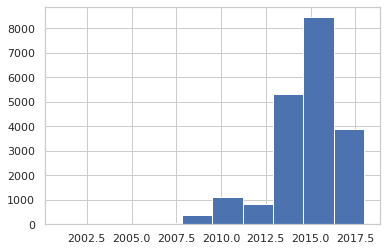

In [610]:
plt.hist(df['year'])

(array([3700., 2690., 2746.,  838., 3324., 1227.,  269., 1600.,  607.,
         197.,  449.,  231.,  137.,   23.,  942.,  692.,   63.,  202.,
          60.,   12.,   38.,   36.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,   27.]),
 array([  0. ,   8.4,  16.8,  25.2,  33.6,  42. ,  50.4,  58.8,  67.2,
         75.6,  84. ,  92.4, 100.8, 109.2, 117.6, 126. , 134.4, 142.8,
        151.2, 159.6, 168. , 176.4, 184.8, 193.2, 201.6, 210. , 218.4,
        226.8, 235.2, 243.6, 252. , 260.4, 268.8, 277.2, 285.6, 294. ,
        302.4, 310.8, 319.2, 327.6, 336. , 344.4, 352.8, 361.2, 369.6,
        378. , 386.4, 394.8, 403.2, 411.6, 420. ]),
 <BarContainer object of 50 artists>)

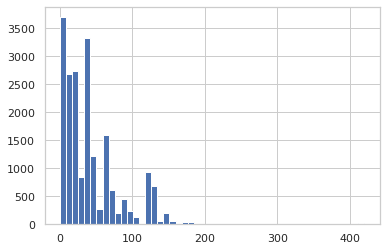

In [490]:
plt.hist(df.sentence,bins=50)

(array([ 626.,  470.,  680.,  683., 1193., 1194., 1087., 1131., 1172.,
         979., 1474., 2070.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

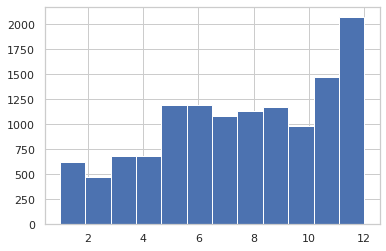

In [576]:
plt.hist(df.month[df['1_bribery']==1],bins=12)

(array([1.400e+01, 5.000e+00, 3.200e+01, 1.400e+01, 9.100e+01, 2.570e+02,
        4.000e+02, 1.141e+03, 1.512e+03, 6.367e+03, 3.248e+03, 3.090e+03]),
 array([2001.        , 2002.41666667, 2003.83333333, 2005.25      ,
        2006.66666667, 2008.08333333, 2009.5       , 2010.91666667,
        2012.33333333, 2013.75      , 2015.16666667, 2016.58333333,
        2018.        ]),
 <BarContainer object of 12 artists>)

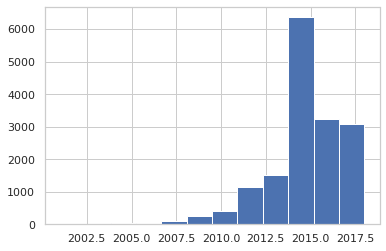

In [577]:
plt.hist(df.year[df['1_bribery']==1],bins=12)

# jionlp库：提取+编译

In [72]:
pip install jionlp

     |████████████████████████████████| 19.0 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 19.2 MB 103.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 457 kB 37.1 MB/s eta 0:00:01
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314476 sha256=0fb56a61bd64f586f01091dfadb68d58c586fe19295407254e33f6bcb01bb2d4
  Stored in directory: /Users/luozeming/Library/Caches/pip/wheels/7d/74/cf/08c94db4b784e2c1ef675a600b7b5b281fd25240dcb954ee7e
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


## 提取 extract; ner.extract

In [104]:
jio.extract_parentheses('杭州市下城区人民法院刑事判决书（2007）下刑初字第410号')

['（2007）']

jio.ner.extract_money()

jio.ner.extract_time()

### 提取金额 
jio.extract_money

jio.ner.extract_money()

In [88]:
import jionlp as jio
text = '张三赔偿李四人民币车费601,293.11元，工厂费一万二千三百四十五元,利息9佰日元，打印费十块钱。' 
moneys = jio.extract_money(text)
moneys

['四人民币', '601,293.11元', '一万二千三百四十五元', '9佰日元', '十块钱']

In [105]:
jio.extract_money(df.decision[1])
jio.extract_money()

['人民币', '二十八万元', '人民币', '41万元']

In [110]:
jio.ner.extract_money(df.decision[1])

[{'text': '人民币二十八万元',
  'offset': [34, 42],
  'type': 'money',
  'detail': {'num': '280000.00', 'case': '元', 'definition': 'accurate'}},
 {'text': '人民币41万元',
  'offset': [145, 152],
  'type': 'money',
  'detail': {'num': '410000.00', 'case': '元', 'definition': 'accurate'}}]

In [113]:
[i['detail'] for i in jio.ner.extract_money(df.decision[1])]

[{'num': '280000.00', 'case': '元', 'definition': 'accurate'},
 {'num': '410000.00', 'case': '元', 'definition': 'accurate'}]

### 提取时间 jio.ner.extract_time

In [90]:
df.decision[1]

'判决如下：一、被告人卓天双犯受贿罪，判处有期徒刑三年三个月，并处罚金人民币二十八万元；（刑期从判决执行之日起计算。判决执行以前先行羁押的，羁押一日折抵刑期一日，即自2017年9月3日起至2020年12月2日止。罚金限于判决生效之日起十日内交纳）。二、被告人卓天双亲属代其退出的受贿犯罪所得款人民币41万元。予以没收，上缴国库。如不服本判决，可在接到判决书的第二日起十日内，通过本院或者直接向广西壮族自治区梧州市中级人民法院提出上诉。书面上诉的，应当提交上诉状正本一份，副本二份。审判长吴汉北审判员卢新燕人民陪审员古贤红二〇一八年五月二十二日书记员朱颖'

In [97]:
jio.ner.extract_time (df.decision[1])[-1]

{'text': '二〇一八年五月二十二日',
 'offset': [259, 270],
 'type': 'time_point',
 'detail': {'type': 'time_point',
  'definition': 'accurate',
  'time': ['2018-05-22 00:00:00', '2018-05-22 23:59:59']}}

## 编译jio.parse

### 其他编译

In [98]:
jio.parse_id_card('411329200101285037')

{'province': '河南省',
 'city': '南阳市',
 'county': '新野县',
 'birth_year': '2001',
 'birth_month': '01',
 'birth_day': '28',
 'gender': '男',
 'check_code': '7'}

In [99]:
jio.parse_id_card('110111200108148215')

{'province': '北京市',
 'city': '北京市',
 'county': '房山区',
 'birth_year': '2001',
 'birth_month': '08',
 'birth_day': '14',
 'gender': '男',
 'check_code': '5'}

In [103]:
print(jio.phone_location('13673699975'),jio.phone_location('18810108916'))
jio.phone_location('17320179388')

{'number': '13673699975', 'province': '河南', 'city': '郑州', 'type': 'cell_phone', 'operator': '中国移动'} {'number': '18810108916', 'province': '北京', 'city': '北京', 'type': 'cell_phone', 'operator': '中国移动'}


{'number': '17320179388',
 'province': '河南',
 'city': '郑州',
 'type': 'cell_phone',
 'operator': '中国电信'}

### 金额编译 jio.parse_money()

In [84]:
import jionlp as jio   
money = "六十四万零一百四十三元一角七分"    
print(jio.parse_money(money))

{'num': '640143.17', 'case': '元', 'definition': 'accurate'}


In [87]:
moneys

['四人民币', '601,293.11元', '一万二千三百四十五元', '9佰日元', '十块钱']

In [86]:
[jio.parse_money(i) for i in moneys]

[{'num': '4.00', 'case': '元', 'definition': 'accurate'},
 {'num': '601293.11', 'case': '元', 'definition': 'accurate'},
 {'num': '12345.00', 'case': '元', 'definition': 'accurate'},
 {'num': '900.00', 'case': '日元', 'definition': 'accurate'},
 {'num': '10.00', 'case': '元', 'definition': 'accurate'}]

In [106]:
[jio.parse_money(i)['num'] for i in moneys]

['4.00', '601293.11', '12345.00', '900.00', '10.00']

In [109]:
jio.parse_money('人民币')

ValueError: the given money_string `` is illegal.

### 地区编译 jio.parse_location

In [76]:
import jionlp as jio    
text = '喀左旗覃家岗街道梨树湾村芭蕉沟村民小组临.222号'    
res = jio.parse_location(text)     
print(res)

{'province': '辽宁省', 'city': '朝阳市', 'county': '喀喇沁左翼蒙古族自治县', 'detail': '旗覃家岗街道梨树湾村芭蕉沟村民小组临.222号', 'full_location': '辽宁省朝阳市喀喇沁左翼蒙古族自治县旗覃家岗街道梨树湾村芭蕉沟村民小组临.222号', 'orig_location': '喀左旗覃家岗街道梨树湾村芭蕉沟村民小组临.222号'}


In [78]:
jio.parse_location('西盟佤族自治县人民法院刑事判决书（2017）云0829刑初100号')  

{'province': '云南省',
 'city': '普洱市',
 'county': '西盟佤族自治县',
 'detail': '人民法院刑事判决书（2017）云0829刑初100号',
 'full_location': '云南省普洱市西盟佤族自治县人民法院刑事判决书（2017）云0829刑初100号',
 'orig_location': '西盟佤族自治县人民法院刑事判决书（2017）云0829刑初100号'}

### 时间编译 jio.parse_time(

In [ ]:
jio.TimeParser()

In [ ]:
 jio.parse_time()

In [83]:
import time     
import jionlp as jio    
res = jio.parse_time('今年9月', time_base={'year': 2021})   
print(res)
res = jio.parse_time('零三年元宵节晚上8点半', time_base=time.time())
print(res)
res = jio.parse_time('一万个小时')     
print(res)
res = jio.parse_time('100天之后', time.time())
print(res)
res = jio.parse_time('每周五下午4点', time.time(), peroid_results_num=2)     
print(res)

{'type': 'time_span', 'definition': 'accurate', 'time': ['2021-09-01 00:00:00', '2021-09-30 23:59:59']}
{'type': 'time_point', 'definition': 'accurate', 'time': ['2003-02-15 20:30:00', '2003-02-15 20:30:59']}
{'type': 'time_delta', 'definition': 'accurate', 'time': {'hour': 10000.0}}
{'type': 'time_span', 'definition': 'blur', 'time': ['2022-08-30 00:00:00', 'inf']}


TypeError: __call__() got an unexpected keyword argument 'peroid_results_num'